#**3. 판다스**
---

-행과 열로 이루어진 2차원 데이터를 효율적으로 가공/처리할 수 있는 기능 제공

-대부분 넘파이 기반으로 작성됨. 넘파이보다 편리하게 데이터 핸들링 가능.

-핵심 객체는 **Dataframe(+Index, Series)**

-Series: column이 하나인 데이터 구조체

->DataFrame은 여러 개의 Series로 이루어졌다고 할 수 있다.



## ■ 판다스 시작-파일을 DataFrame으로 로딩, 기본 API

---

In [1]:
import pandas as pd

(캐글(Kaggle)에서 제공하는 타이타닉 탑승자 파일을 판다스의 DataFrame으로 로딩)

-판다스는 다양한 포맷으로 된 파일을 DataFrame으로 로딩할 수 있는 편리한 API 제공

ex) read_csv(), read.table(), read_fwf()

1)read_csv: CSV(column을 ','로 구분한 파일 포맷) 파일 포맷 변환을 위한 API

2) read_table(): 디폴트 필드 구분 문자: tab('\t)

3) read_fwf(): Fixed Width, 즉 고정 길이 기반의 칼럼 포맷을 DataFrame으로 로딩하기 위한 API

-read_csv()는 필드 구분 문자 기반의 파일 포맷이면 다 DataFrame으로 변환 가능

-read_csv('파일명',sep=',')와 같이 sep으로 구분 문자 입력(기본값=',')

사용법:

In [2]:
titanic_df = pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
print('DataFrame 크기 :',titanic_df.shape)

DataFrame 크기 : (891, 12)


---

-정보 조회: info(), describe()

**1) info()**

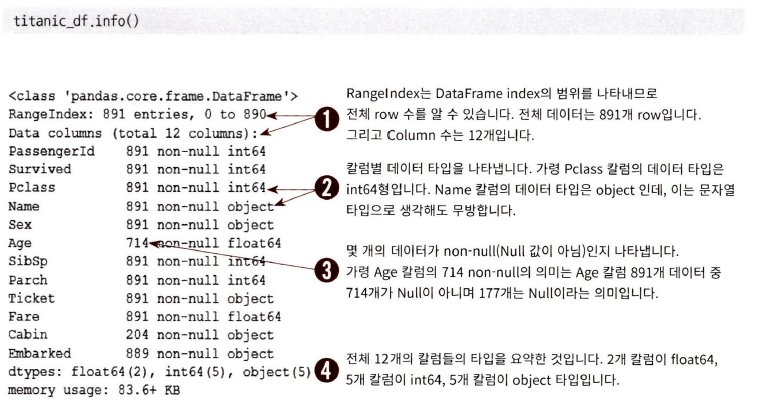

**2) describe()**

: column별 숫자형 데이터값의 n-percentile 분포도, 평균값, 최댓값, 최솟값 나타냄

-숫자형(int,float 등) column의 분포도만 조사하여 자동으로 object(문자열) 타입의 column을 출력에서 제외시킴.

In [9]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


-describe()는 해당 숫자 칼럼이 숫자형 카테고리 칼럼인지 판단할 수 있게 함.

-<u>카테고리 칼럼</u>: 특정 범주에 속하는 값에 숫자 할당한 칼럼

예) 남:1,여:2

판단 예) survived:min,25~75% 다 0,max=1

->survived는 0과 1로 이루어진 숫자형 카테고리 칼럼.

---

-DataFrame의 [] 연산자 내부에 칼럼명 입력 시 <u>Series</u> 형태로 특정 칼럼 데이터 세트 반환됨.

-**value_counts()**: 지정된 칼럼값의 유형, 건수 확인 가능.

<u>-Series에서만 사용 가능!!! DataFrame에선 사용 불가하다!!</u>

In [10]:
value_counts = titanic_df['Pclass'].value_counts(0)
print(value_counts)

3    491
1    216
2    184
Name: Pclass, dtype: int64


=3이 491개, 1이 216개, 2가 184개.

=많은 건수 순서로 정렬되어 값을 반환.

---

-Series는 Index와 단 하나의 칼럼으로 구성된 데이터 세트.

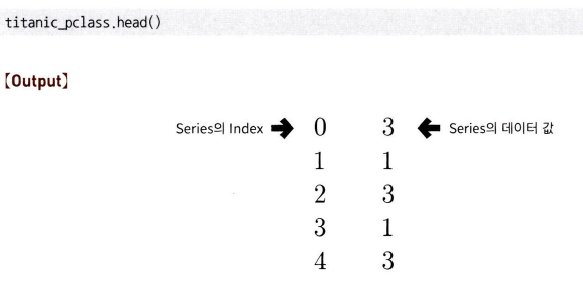

-DataFrame,Series: 반드시 인덱스를 가진다.

-value_counts()의 반환값 역시 Series.

**Index**는,

-단순히 순차 값과 같은 의미없는 식별자만 할당하는 것이 아니라

<u>고유성이 보장된다면 의미 있는 데이터값 할당도 가능</u>

-DataFrame, Series가 만들어진 후에도 <u>변경 가능.</u>

## ■ DataFrame과 리스트, 딕셔너리, 넘파이 ndarray 상호 변환

---

**1. 넘파이 ndarray, 리스트, 딕셔너리를 DataFrame으로 변환하기**

1) 생성인자 data에 ndarray, 리스트, 딕셔너리 입력받기

2) 생성인자 column에 칼럼명 리스트 입력받기

-일반적으로 딕셔너리를 DataFrame으로 변환 시

딕셔너리의 <u>key는 칼럼명</u>, value는 키에 해당하는 칼럼 데이터로 변환된다.

In [4]:
dict= {'col1':[1,11], 'col2':[2,22],'col3':[3,33]}
df_dict=pd.DataFrame(dict)
print('딕셔너리로 만든 DataFrame:\n',df_dict)

딕셔너리로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    22    33


---

**2. DataFrame을 넘파이 ndarray, 리스트, 딕셔너리로 변환하기**

-많은 머신러닝 패키지가 기본 데이터 형으로 넘파이 ndarray 사용

->데이터 핸들링은 DataFrame을 이용하더라도 다시 ndarray로 변환

**ex1)DataFrame을 ndarray로 변환.**

=DataFrame 객체의 <u>values</u>를 이용.

In [5]:
array3=df_dict.values
print('df_dict.values 타입:', type(array3), 'df_dict.values shape:', array3.shape)
print(array3)

df_dict.values 타입: <class 'numpy.ndarray'> df_dict.values shape: (2, 3)
[[ 1  2  3]
 [11 22 33]]


**ex2)DataFrame을 리스트로 변환.**

=values로 얻은 ndarray에 <u>tolist()</u> 호출.

In [7]:
list3=df_dict.values.tolist()
print('df_dict.values.tolist) 타입', type(list3))
print(list3)

df_dict.values.tolist) 타입 <class 'list'>
[[1, 2, 3], [11, 22, 33]]


**ex3)DataFrame을 딕셔너리로 변환.**

=DataFrame 객체의 <u>to_dict()</u> 메서드 호출.

(인자로 'list'입력 시 딕셔너리 값이 리스트형으로 변환됨)

In [8]:
dict3=df_dict.to_dict('list')
print('df_dict.to_dict() 타입:', type(dict3))
print(dict3)

df_dict.to_dict() 타입: <class 'dict'>
{'col1': [1, 11], 'col2': [2, 22], 'col3': [3, 33]}


## ■ DataFrame의 칼럼 데이터 세트 생성과 수정

---

-[] 연산자로 쉽게 가능

ex1) Series에 상숫값(=0) 할당하면 Series의 모든 데이터 세트에 일괄적으로 적용됨.

In [9]:
titanic_df['Age_0']=0
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


ex2) 기존 칼럼 Series의 데이터를 이용해 새로운 칼럼 Series 만들기

In [10]:
titanic_df['Age_by_10'] = titanic_df['Age']*10
titanic_df['Family_No'] = titanic_df['SibSp'] + titanic_df['Parch']+1
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,260.0,1


## ■ DataFrame 데이터 삭제

---

-drop() 메서드 이용

-drop() 메서드의 원형:

DataFrame.drop(**labels=None**, **axis=0**, index=None, columns=None, level=None, **inplace=False**, errors='raise')

-labels, axis, inplace가 가장 중요한 파라미터들

-axis값에 따라 특정 칼럼 또는 특정 행 드롭.

-<u>axis=0:row방향 축, axis=1: column 방향 축</u>

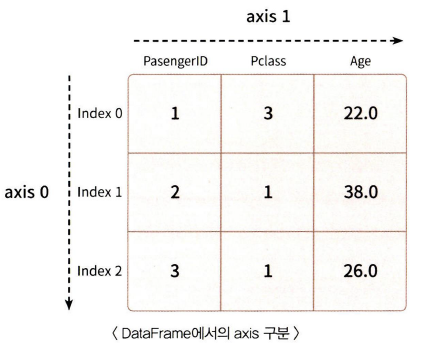

->labels에 원하는 칼럼명 입력 후 axis=1 입력하면 칼럼을 드롭하겠다는 의미.

-<u>inplace=True</u> 설정 시 자신의 DataFrame의 데이터 삭제.

(반환 값은 None이 되므로 다시 자신의 DataFrame 객체로 할당하면 안된다.)

-여러 개의 칼럼 삭제 시 칼럼명을 리스트 형태로 입력.

**<정리>**

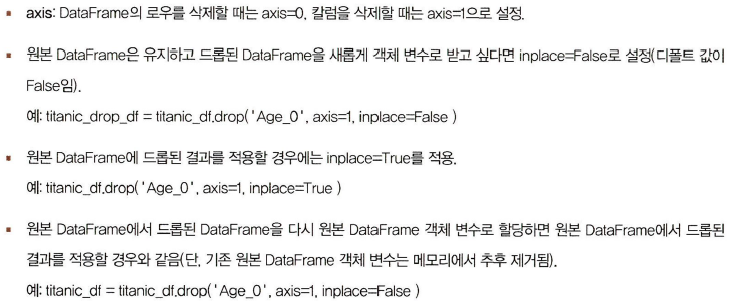

## ■ Index 객체

---

-Index 객체만 추출:<u>DataFrame.index/Series.index</u> 이용.

-반환된 index 객체의 실제 값은 넘파이 1차원 ndarray

-<u>values</u> 속성으로 ndarray 값 알 수 있음

-index 객체의 값 변경은 불가능

-index는 오직 식별용으로만 사용되어 연산에서 제외됨

-<u>reset_index()</u> 메서드 수행 시 새롭게 인덱스를 연속 숫자형으로 할당, 기존 인덱스는 index라는 새로운 칼럼명으로 추가됨.

->Series에 적용할 경우 기존 인덱스가 칼럼으로 추가되어 칼럼이 2개가 되므로 Series가 아닌 DataFrame이 반환됨

In [13]:
titanic_reset_df=titanic_df.reset_index(inplace=False)
titanic_reset_df.head(3)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0,2
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0,2
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,260.0,1


-reset_index는 인덱스가 연속된 int 숫자형 데이터가 아닐 경우에 주로 사용됨

ex)

In [16]:
print('### before reset_index ###')
value_counts=titanic_df['Pclass'].value_counts()
print(value_counts)
print('value_counts 객체 변수 타입:', type(value_counts))
new_value_counts = value_counts.reset_index(inplace=False)
print('\n### After reset_index ###')
value_counts=titanic_df['Pclass'].value_counts()
print(new_value_counts)
print('new_value_counts 객체 변수 타입:', type(new_value_counts))

### before reset_index ###
3    491
1    216
2    184
Name: Pclass, dtype: int64
value_counts 객체 변수 타입: <class 'pandas.core.series.Series'>

### After reset_index ###
   index  Pclass
0      3     491
1      1     216
2      2     184
new_value_counts 객체 변수 타입: <class 'pandas.core.frame.DataFrame'>


+)reset_index()의 parameter 중 drop=True로 설정하면

기존 인덱스는 새로운 칼럼으로 추가되지 않고 삭제(drop)된다.

## ■ 데이터 셀렉션 및 필터링

---

판다스에선 넘파이와 []연산자의 차이 존재

**1. DataFrame의 [ ] 연산자**

DataFrame 뒤에 있는 [ ]는 칼럼만 지정할 수 있는 '칼럼 지정 연산자'

-[ ] 안에 숫자 값을 입력할 경우 오류 발생하지만, [0:2]와 같은 슬라이싱을 이용할 시 원하는 결과 반환 가능

**<정리>**

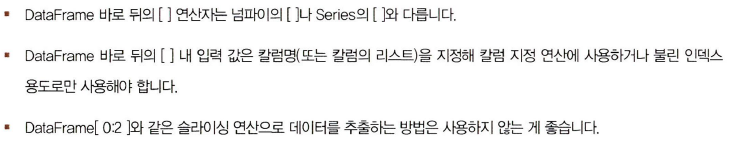

**2. DataFrame ix[ ] 연산자**

ix[인덱스값,'칼럼명(or 칼럼의 위치값)']

-사라지고 칼럼 명칭 기반 인덱싱 연산자인 **loc[ ]**, 칼럼 위치 기반 익섹싱 연산자 **iloc[ ]** 생성됨

**3. 명칭 기반 인덱싱과 위치 기반 인덱싱의 구분**

명칭(Label) 기반 인덱싱:칼럼의 명칭을 기반으로 위치 지정하는 방식

위치(Position) 기반 인덱싱: 0을 출발점으로 하는 가로축,세로축 좌표 기반의 행과 열 위치를 기반으로 데이터 지정.

**4. DataFrame iloc[ ] 연산자**

위치 기반 인덱싱만 허용.

->행과 열 값으로 integer 또는 integer형의 슬라이싱, 팬시 리스트 값을 입력해줘야함.

-불린 인덱싱은 제공하지 않음

**5. DataFrame loc[ ] 연산자**

명칭 기반으로 데이터 추출.

-index가 숫자형일 수 있기 때문에 무조건 문자열 입력하는 거 아님!

-명칭이 숫자형이 아닐 수 있기 때문에 인덱싱 할 때 시작값\~(종료값-1) 이 아닌 시작값~종료값

**6. 불린 인덱싱**

In [17]:
titanic_df = pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
titanic_boolean = titanic_df[titanic_df['Age']>60]  #나이가 60세 이상인 데이터 추출
print(type(titanic_boolean))
titanic_boolean

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [20]:
#나이가 60세 이상인 승객의 나이와 이름만 추출
titanic_df[titanic_df['Age']>60][['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0


In [22]:
#loc[ ] 이용 시 ['Name', 'Age']는 칼럼 위치에 놓아야함
titanic_df.loc[titanic_df['Age']>60,['Name', 'Age']].head(3)

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0


## ■ 정렬, Aggregation 함수, GroupBy 적용

---

**1. DataFrame, Series의 정렬 - sort_values( )**

sort_values( )의 주요 입력 파라미터 : by, ascending, inplace

**by**로 특정 칼럼 입력 시 해당 칼럼으로 정렬 수행(.sort_values(by='Name'))

**ascending=True**(기본값)로 설정 시 오름차순 정렬

**inplace=False**(기본값)로 설정 시 sort_value( )를 호출한 DataFrame은 그대로 유지하며 정렬된 DataFrame을 결과로 반환.

**2. Aggregation 함수 적용**

min( ), max( ), sum( ), count( )

모든 칼럼에 해당 aggregation 적용

->특정 칼럼에 aggregaiton 함수 적용 위해서는 DataFrame에 대상 칼럼들만 추출해 aggregation 적용하면 된다.

In [23]:
#예시
titanic_df[['Age','Fare']].mean()

Age     29.699118
Fare    32.204208
dtype: float64

**3. groupby( ) 적용**

입력 파라미터 by에 칼럼 입력 시 대상 칼럼으로 groupby됨

DataFrameGroupBy라는 또 다른 형태의 DataFrame 반환함.

Dataframe에 groupby( )를 호출해 반환된 결과에 aggregation 함수를 호출하면 <u>groupby( ) 대상 칼럼을 제외한 모든 칼럼에</u> 해당 aggregation 함수를 적용함

In [26]:
#예시
#'Pclass'를 제외하고 count한다.
titanic_groupby = titanic_df.groupby('Pclass').count()
titanic_groupby

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [28]:
#예시2
#여러개의 칼럼에 aggregation 함수 호출하려면 필터링 한 후 수행
titanic_groupby = titanic_df.groupby('Pclass')['PassengerId','Survived'].count()
titanic_groupby

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


In [33]:
#예시3
#서로 다른 aggregation 함수 적용하려면 agg() 내에 인자로 입력해서 사용
titanic_df.groupby('Pclass')['Age'].agg([max,min])

,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


In [36]:
#예시4
#여러개의 칼럼에 서로 다른 aggregation 함수 적용
#agg() 내에 입력 값으로 딕셔너리 형태
agg_format = {'Age':'max', 'SibSp':'sum', 'Fare':'mean'}
titanic_df.groupby('Pclass').agg(agg_format)

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


## ■ 결손 데이터(Missing data) 처리하기

---

결손 데이터(Missing Data): 칼럼에 값이 없는, 즉 NULL인 경우 의미.

NaN은 함수 연산 시 제외됨.

NaN 여부 확인하는 API:**isna( )**

NaN 값을 다른 값으로 대체하는 API : **fillna( )**

**1. isna( ) 로 결손 데이터 여부 확인**

In [37]:
#sum()함수 추가하여 결손 데이터의 개수 구할 수 있다.
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**2. fillna()로 결손 데이터 대체하기**

In [38]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C000,S


fillna()를 이용해 반환값을 다시 받거나 inplace=True 파라미터를 fillna()에 추가해야 실제 데이터 세트 값이 변경된다.

In [39]:
#연습문제
#'Age' 칼럼의 NaN 값을 평균 나이로, 'Embarked' 칼럼의 NaN 값을 'S'로 대체하기
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## ■ apply lambda 식으로 데이터 가공

---

판다스는 apply 함수에 lamda 식을 결합해 DataFrame이나 Series의 레코드 별로 데이터를 가공하는 기능 제공함.

In [40]:
#1) 입력값의 제곱값을 구해서 반환하는 함수
def get_square(a):
  return a**2

print('3의 제곱은:', get_square(3))

#2) lambda 이용하여 한 줄의 식으로 변환
lambda_square = lambda x : x**2
print('3의 제곱은:', lambda_square(3))

3의 제곱은: 9
3의 제곱은: 9


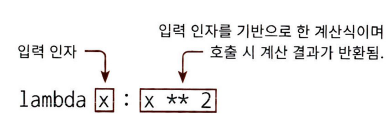

여러 개의 값을 입력 인자로 사용해야 할 경우: <u>map()</u> 함수 이용

In [41]:
a = [1,2,3]
squares=map(lambda x : x**2, a)
list(squares)

[1, 4, 9]

---

판다스의 DataFrame의 apply에 lambda 식 적용하여 데이터 가공

In [45]:
#'Name'칼럼의 문자열 개수를 별도의 칼럼인 'Name_len'으로 생성
titanic_df['Name_len'] = titanic_df['Name'].apply(lambda x : len(x))
titanic_df[['Name', 'Name_len']].head(3)

,Name,Name_len
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22


In [46]:
#15세 미만이면 'Child', 그렇지 않으면 'Adult'로 구분하는 'Child_Adult' 칼럼 추가
#lambda 식에 if else 이용
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x : 'Child' if x<=15 else 'Adult')
titanic_df[['Age','Child_Adult']].head(8)

,Age,Child_Adult
0,22.000000,Adult
1,38.000000,Adult
2,26.000000,Adult
3,35.000000,Adult
4,35.000000,Adult
5,29.699118,Adult
6,54.000000,Adult
7,2.000000,Child


** if else 주의할 점**

-if식보다 반환값을 먼저 서술해야함.

-if,else만 지원하고 if, else if, else는 지원X

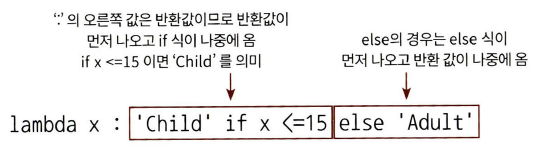

In [47]:
#여러 조건 거는 방법
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : 'Child' if x<=15 else ('Adult' if x<=60 else 'Elderly'))
titanic_df['Age_cat'].value_counts()
#너무 많아질 경우 별도의 함수 생성하는 게 낫다.

Adult      786
Child       83
Elderly     22
Name: Age_cat, dtype: int64

In [48]:
#나이에 따라 세분화된 분류 수행하는 함수 생성.
def get_category(age):
  cat=''
  if age<=5: cat = 'Baby'
  elif age<=12 : cat= 'Child'
  elif age<=18 : cat= 'Teenager'
  elif age<=25 : cat= 'Student'
  elif age<=35 : cat= 'Young Adult'
  elif age<=60 : cat= 'Adult'
  else : cat = 'Elderly'

  return cat

#lambda 식에 위에서 생성한 get_category() 함수를 반환값을 ㅗ지정
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age', 'Age_cat']].head()

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult
